# PROBLEM STATEMENT AND BUSINESS CASE
 - The dataset contains a series of images that can be used to solve the Happy House problem!
    - We need to build an artificial neural network that can detect smiling faces.
    - Only smiling people will be allowed to enter the house!
    - The train set has 600 examples. The test set has 150 examples.
    - Data Source: https://www.kaggle.com/iarunava/happy-house-dataset

# IMPORTING DATA

In [36]:
# import libraries 
import pandas as pd             # Import Pandas for data manipulation using dataframes
import numpy as np              # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py
import random

filename = 'train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

happy_training = h5py.File('train_happy.h5', "r")
happy_testing  = h5py.File('test_happy.h5', "r")

X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:])

X_train
X_train.shape
y_train
y_train.shape

list_classes
train_set_x
train_set_y


(600,)

#  VISUALIZATION OF THE DATASET

0


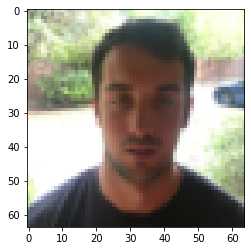

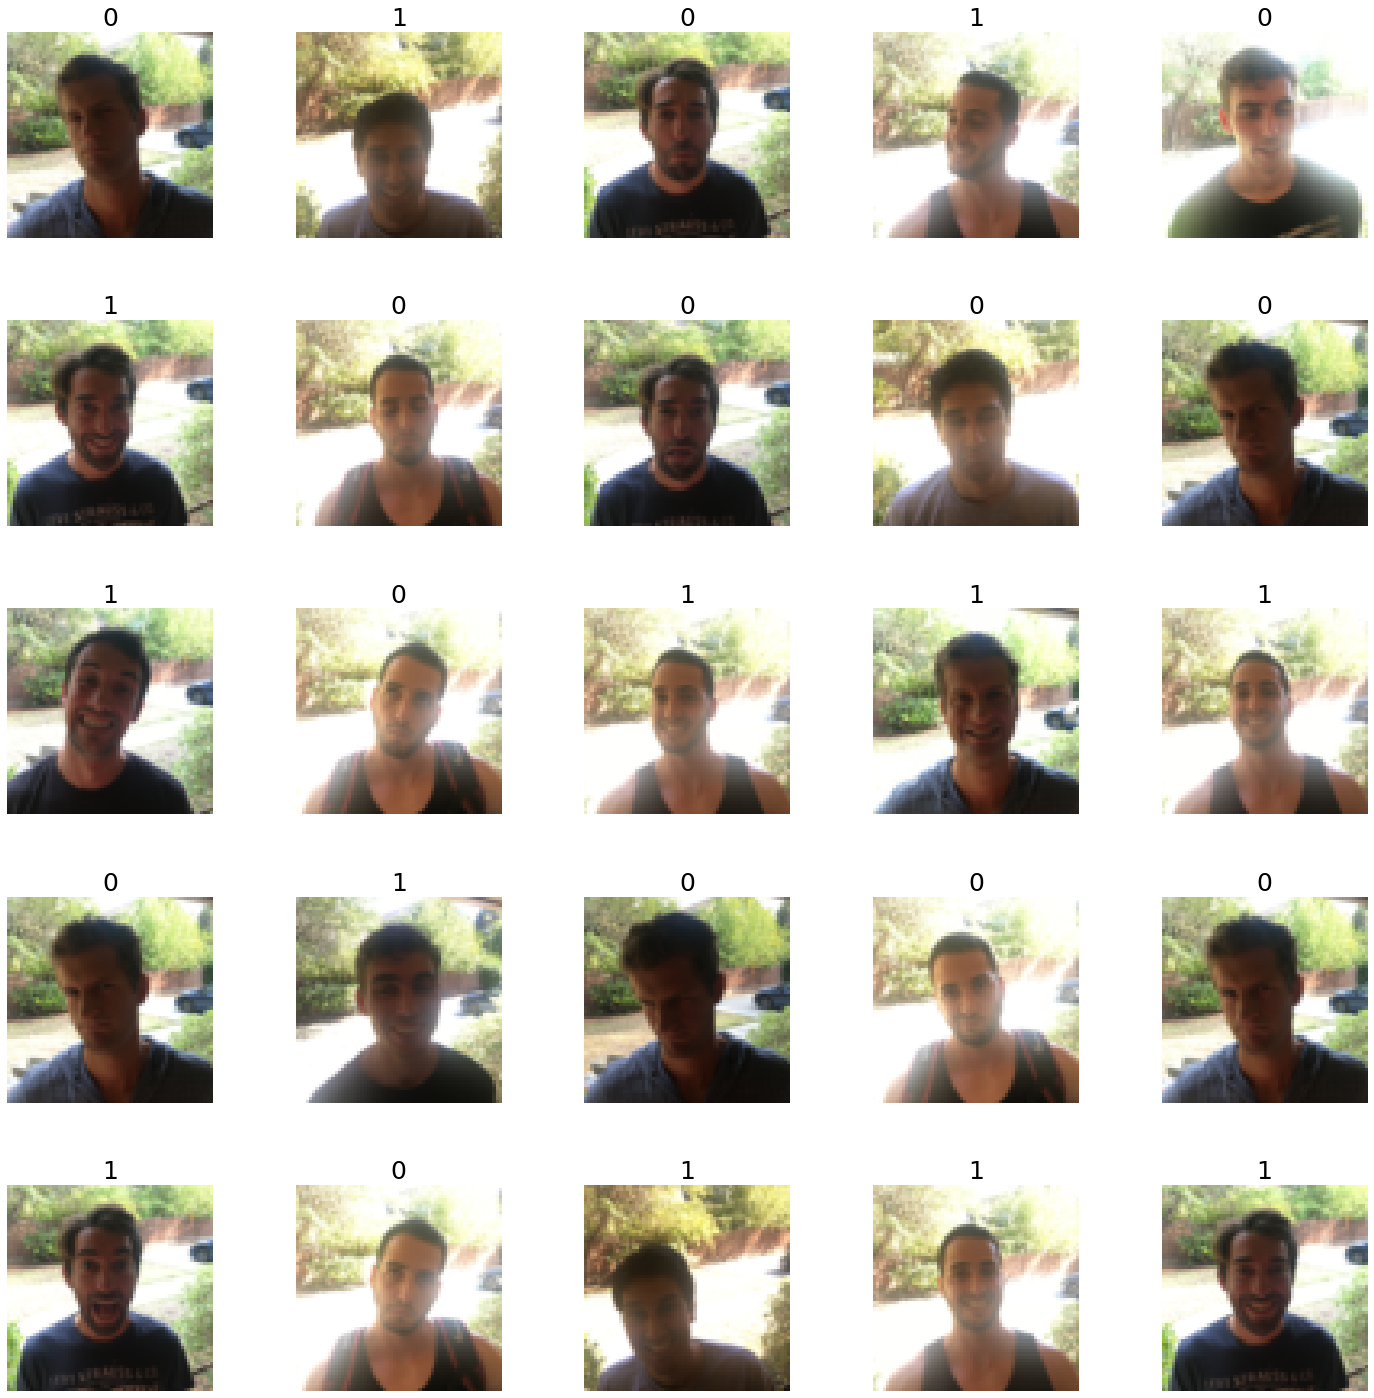

In [37]:
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( X_train[i] )
print(y_train[i])

#Let's view more images in a grid format
#Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

#fig, axes = plt.subplots(L_grid, W_grid)
#subplot return the figure object and axes object
#we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() #flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) #get the length of the training dataset

#Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): #create evenly spaces variables 

    #Select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

1


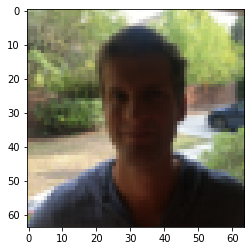

In [38]:
i = random.randint(1,len(y_train)) # select any random index from 1 to 600
plt.imshow( X_train[i])
print(y_train[i])

# TRAINING THE MODEL

C:\Users\post\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), input_shape=(64, 64, 3..., activation="relu")`
C:\Users\post\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
C:\Users\post\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\Users\post\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
C:\Users\post\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/5
600/600 [==============================] - 9s 16ms/step - loss: 0.7142 - accuracy: 0.5117
Epoch 2/5
600/600 [==============================] - 9s 15ms/step - loss: 0.5767 - accuracy: 0.7150
Epoch 3/5
600/600 [==============================] - 9s 15ms/step - loss: 0.3843 - accuracy: 0.8300
Epoch 4/5
600/600 [==============================] - 9s 15ms/step - loss: 0.2767 - accuracy: 0.8800
Epoch 5/5
600/600 [==============================] - 9s 15ms/step - loss: 0.2336 - accuracy: 0.9117


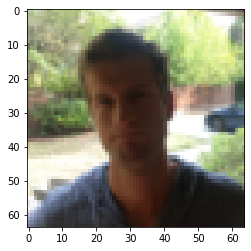

In [39]:
# Let's normalize dataset
#maximum value is 255 within our data
X_train = X_train/255
X_test = X_test/255

X_train
plt.imshow(X_train[10])
X_train.shape
y_train.shape

#Import train_test_split from scikit library
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


cnn_model = Sequential()
cnn_model.add(Conv2D(64, 6, 6, input_shape = (64,64,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, 5, 5, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))
cnn_model.add(Dense(output_dim = 1, activation = 'sigmoid'))


cnn_model.compile(loss ='binary_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

epochs = 5
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 30,
                        nb_epoch = epochs,
                        verbose = 1)


### CONVOLUTIONAL NEURAL NETWORK: FEATURE DETECTOR ###

    - Convolutions use a kernel matrix to scan a given image and apply a filter to obtain a certain effect. 
    - An image Kernel is a matrix used to apply effects such as blurring and sharpening. 
    - Kernels are used in machine learning for feature extraction to select most important pixels of an image.
    - Convolution preserves the spatial relationship between pixels. 

### CONVOLUTIONAL NEURAL NETWORK: RELU ###

    - RELU Layers are used to add non-linearity in the feature map.
    - It also enhances the sparsity or how scattered the feature map is.
    - RELU Layers are used to add non-linearity in the feature map.
    - It also enhances the sparsity or how scattered the feature map is.
    - The gradient of the RELU does not vanish as we increase x compared to the sigmoid function

### CONVOLUTIONAL NEURAL NETWORK: MAXPOOLING/FLATTENING ###

    - Pooling or down sampling layers are placed after convolutional layers to reduce feature map dimensionality.
    - This improves the computational efficiency while preserving the features.
    - Pooling helps the model to generalize by avoiding overfitting. If one of the pixel is shifted, the pooled feature map will still be the same.
    - Max pooling works by retaining the maximum feature response within a given sample size in a feature map.
    - Live illustration : http://scs.ryerson.ca/~aharley/vis/conv/flat.html

### CONVOLUTIONAL NEURAL NETWORK: INCREASE FILTERS/DROPOUT ###

    - Improve accuracy by adding more feature detectors/filters or adding a dropout. 
    - Dropout refers to dropping out units in a neural network.
    - Neurons develop co-dependency amongst each other during training
    - Dropout is a regularization technique for reducing overfitting in neural networks. 
    - It enables training to occur on several architectures of the neural network

# EVALUATING THE MODEL

150/150 [==============================] - 1s 4ms/step
Test Accuracy : 0.893
Prediction Class = [1]
 True Class = 1


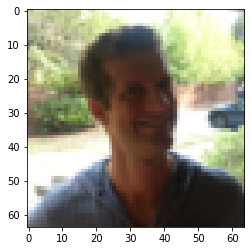

In [45]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

predicted_classes.shape
y_test.shape


plt.imshow(X_test[10])
print("Prediction Class = {}\n True Class = {}".format(predicted_classes[10], y_test[10]))

In [46]:
axes[i].set_title("Guess{}\n True{}".format(predicted_classes[i], y_test[i]))


IndexError: index 264 is out of bounds for axis 0 with size 25

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        66
           1       0.89      0.93      0.91        84

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



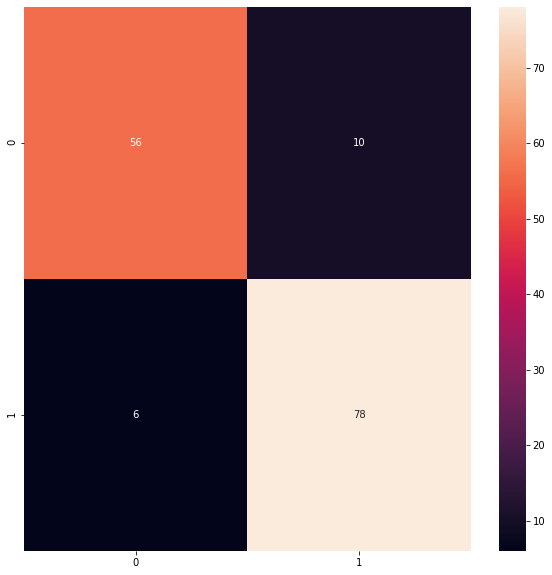

In [47]:
#axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
#Sum the diagonal element to get the total true correct values

from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_classes))